In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('D:\PycharmProjects\Sign-CNN\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\PycharmProjects\Sign-CNN\data\american_sign_language.PNG
D:\PycharmProjects\Sign-CNN\data\amer_sign2.png
D:\PycharmProjects\Sign-CNN\data\amer_sign3.png
D:\PycharmProjects\Sign-CNN\data\sign_mnist_test.csv
D:\PycharmProjects\Sign-CNN\data\sign_mnist_train.csv
D:\PycharmProjects\Sign-CNN\data\sign_mnist_test\sign_mnist_test.csv
D:\PycharmProjects\Sign-CNN\data\sign_mnist_train\sign_mnist_train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import sklearn
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
train_df = pd.read_csv("D:\PycharmProjects\Sign-CNN\data\sign_mnist_train\sign_mnist_train.csv")
test_df = pd.read_csv("D:\PycharmProjects\Sign-CNN\data\sign_mnist_test\sign_mnist_test.csv")

In [4]:
test = pd.read_csv("D:\PycharmProjects\Sign-CNN\data\sign_mnist_test\sign_mnist_test.csv")
y = test['label']

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
labels = train_df['label'].values

In [7]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

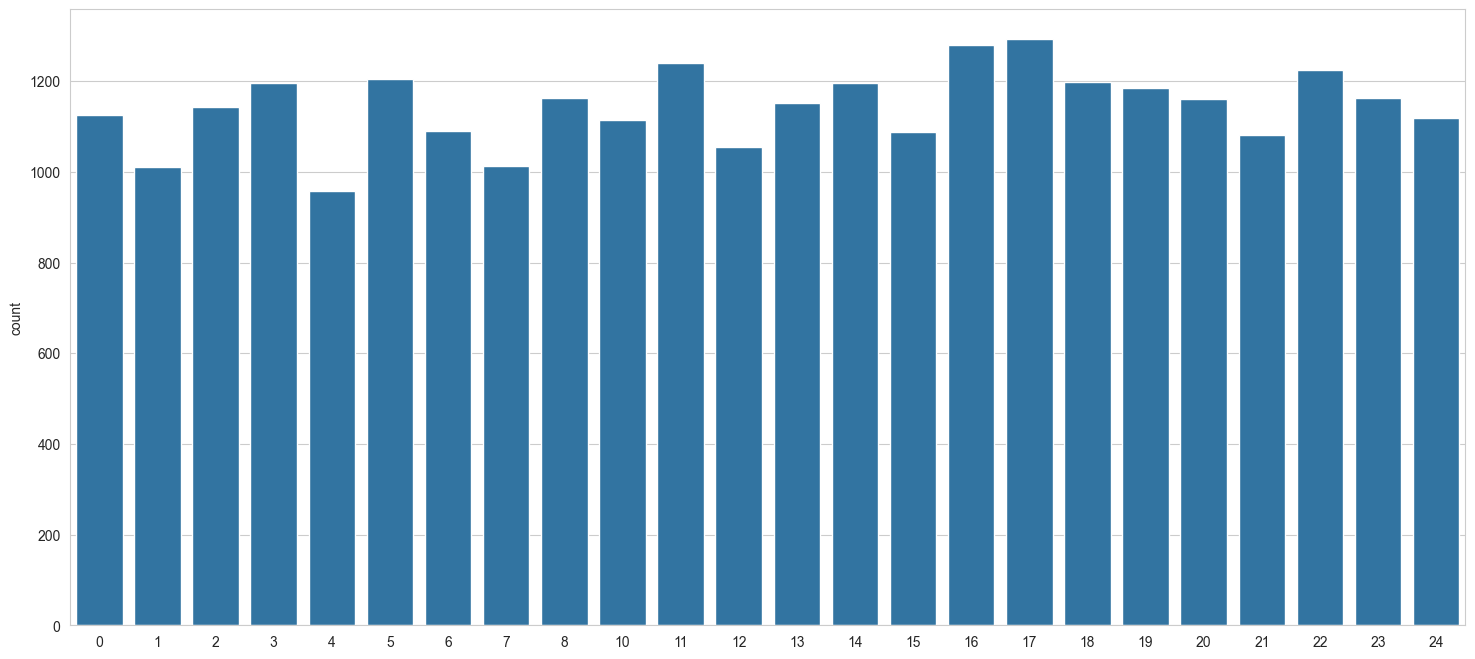

In [8]:
plt.figure(figsize = (18,8))
sns.countplot(x = labels)

In [9]:
train_df.drop('label', axis = 1, inplace = True)

In [10]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [11]:
images = train_df.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [12]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [13]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


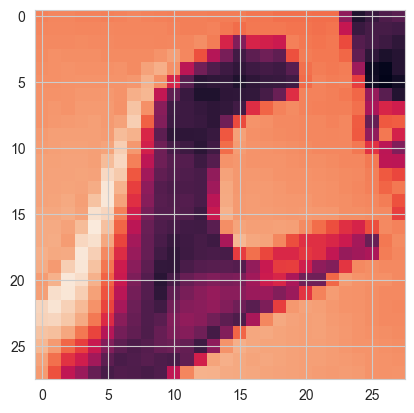

In [14]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [15]:
import cv2
import numpy as np

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im
    sample = sample.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("Resized Image", sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [18]:
x_train = x_train / 255
x_test = x_test / 255

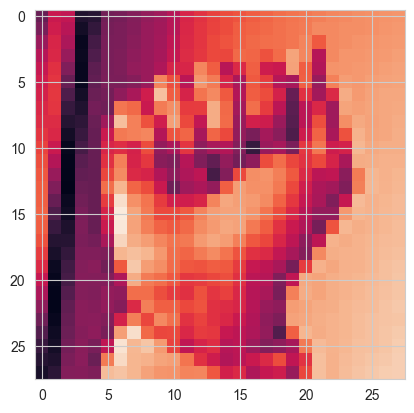

In [19]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [20]:
model = Sequential()
model.add(Conv2D(64 , kernel_size=(3,3) , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64 , kernel_size=(3,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64 , kernel_size=(3,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 24 , activation = 'softmax'))

D:\envs\Sign-CNN\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
from keras.src.optimizers import Adam

model.compile(loss = 'categorical_crossentropy', optimizer = Adam() , metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,912 (335.59 KB)

 Trainable params: 85,912 (335.59 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(x_train, y_train ,epochs = epochs , validation_data = (x_test, y_test) , batch_size = batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.0871 - loss: 3.0325 - val_accuracy: 0.4549 - val_loss: 1.7486
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.4545 - loss: 1.6282 - val_accuracy: 0.7146 - val_loss: 0.9049
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 26s 175ms/step - accuracy: 0.6837 - loss: 0.9377 - val_accuracy: 0.8064 - val_loss: 0.6147
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 156ms/step - accuracy: 0.7887 - loss: 0.6408 - val_accuracy: 0.8650 - val_loss: 0.4291
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 175ms/step - accuracy: 0.8451 - loss: 0.4624 - val_accuracy: 0.9024 - val_loss: 0.3107
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.8854 - loss: 0.3398 - val_accuracy: 0.9261 - val_loss: 0.2326
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 26s 173ms/step - accuracy: 0.9206 - loss: 0.2468 - val_accuracy: 0.9476 - val_loss: 0.1727
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 43s 185ms/step - accuracy: 0.9382 - loss: 0

In [24]:
model.save("sign_language_model.h5")
print("Model is saved")

Model is saved


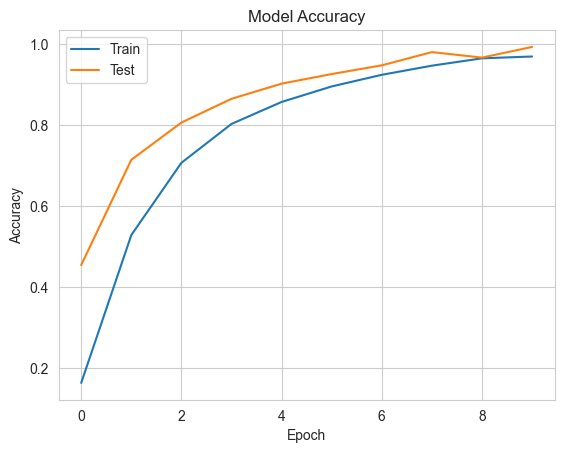

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
test_labels = test_df['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step


In [26]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")



258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9920 - loss: 0.0447
Accuracy of the model is -  99.29586052894592 %


In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.7975460122699386

In [32]:
predict_x = model.predict(x_test) 
classes_x = np.argmax(predict_x,axis=1)
for i in range(len(classes_x)):
    if(classes_x[i] >= 9):
        classes_x[i] += 1
classes_x[:5]   

258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([ 5, 12,  4, 17, 18], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the predicted labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

print(cm)

258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
[[336   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 301   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 353   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 348   0   0   0   0   0   0   0   0   0   0   0   1   0   1
    0   0   0   0   0   0]
 [  0   0   0   0 280   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 369   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 313   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 325   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 344   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 333   0   0

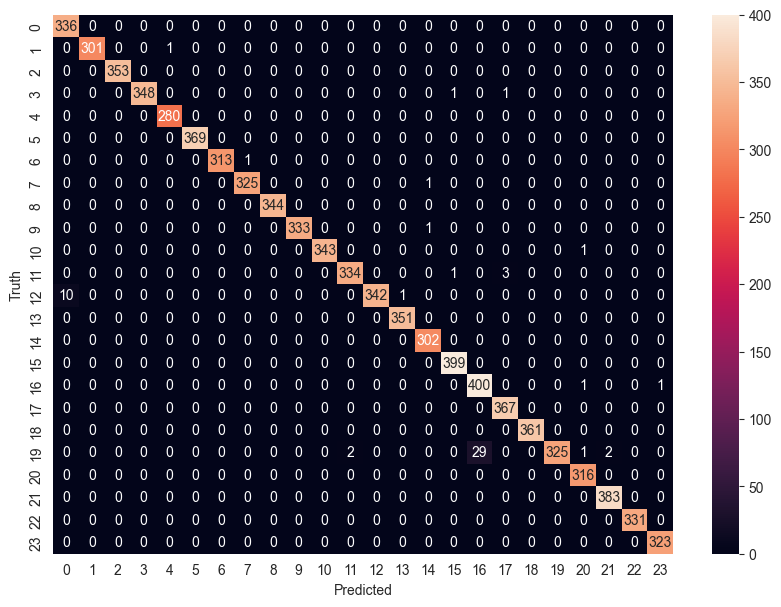

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cm is your confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [39]:
# Assuming cm is your confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Calculate the accuracy for each class
class_accuracy = cm.diagonal()/cm.sum(axis=1)

# Print the accuracy for each class
for i, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for class {i}: {accuracy*100}%")

Accuracy for class 0: 100.0%
Accuracy for class 1: 99.66887417218543%
Accuracy for class 2: 100.0%
Accuracy for class 3: 99.42857142857143%
Accuracy for class 4: 100.0%
Accuracy for class 5: 100.0%
Accuracy for class 6: 99.68152866242038%
Accuracy for class 7: 99.69325153374233%
Accuracy for class 8: 100.0%
Accuracy for class 9: 99.7005988023952%
Accuracy for class 10: 99.70930232558139%
Accuracy for class 11: 98.81656804733728%
Accuracy for class 12: 96.88385269121812%
Accuracy for class 13: 100.0%
Accuracy for class 14: 100.0%
Accuracy for class 15: 100.0%
Accuracy for class 16: 99.50248756218906%
Accuracy for class 17: 100.0%
Accuracy for class 18: 100.0%
Accuracy for class 19: 90.5292479108635%
Accuracy for class 20: 100.0%
Accuracy for class 21: 100.0%
Accuracy for class 22: 100.0%
Accuracy for class 23: 100.0%


In [29]:
def getLetter(result):
    classLabels = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 10: 'K', 11: 'L', 12: 'M',
        13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'
    }
    try:
        res = int (result)
        return classLabels[res]
    except:
        return 'Not Found'

In [30]:
import cv2
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read() 
    roi = frame[100:400, 320:620]
    cv2.imshow("ROI", roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    cv2.imshow("ROI scaled and grey", roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (0, 255, 0), 5)
    roi = roi.reshape(1, 28, 28, 1)
    result = model.predict(roi, verbose=0)
    predicted_class = np.argmax(result[0])
    predicted_class = str(predicted_class)
    
    cv2.putText(copy, getLetter(predicted_class), (300, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2)
    cv2.imshow("Frame", copy)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()